In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from aiida import load_dbenv
load_dbenv()

In [4]:
from aiida.orm.utils import DataFactory
from aiida.work.workfunction import workfunction as wf
from aiida.orm import DataFactory
from aiida.orm.data.base import Str
from aiida.orm.data.base import List
import ase
from aiida.orm.code import Code


In [5]:
%matplotlib notebook

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.pyplot import plot, draw, show, ion

In [6]:
pressures = [0.1, 1, 5, 10, 20, 30, 40, 60]

In [7]:
from aiida_raspa.calculations import RaspaCalculation
from aiida.orm.data.base import Float
from aiida.work.run import run

In [8]:
def generate_input_params(codename, pressure=10):
    # The inputs
    inputs = RaspaCalculation.process().get_inputs_template()

    inputs.code = Code.get_from_string(codename.value)
    inputs._options.resources = {"num_machines": 1, "num_mpiprocs_per_machine":1}
    inputs._options.max_wallclock_seconds = 3 * 60

    # Calculation parameters
    parameters_dict = {
    "GeneralSettings":
    {
    "SimulationType"                   : "MonteCarlo",
    "NumberOfCycles"                   : 10000,
    "NumberOfInitializationCycles"     : 1000,
    "RestartFile"                      : "no",
    "PrintEvery"                       : 1000,
    "Forcefield"                       : "GarciaPerez2006",
    "ModifyOxgensConnectedToAluminium" : "yes",
    "Framework"                        : 0,
    "FrameworkName"                    : "LTA4A",
    "RemoveAtomNumberCodeFromLabel"    : "yes",
    "UnitCells"                        : [1, 1, 1],
    "ExternalTemperature"              : 298.0,
    "ExternalPressure"                 : pressure,
    },
    "Component":
    [{
    "MoleculeName"                     : "methane",
    "MoleculeDefinition"               : "TraPPE",
    "BlockPockets"                     : "yes",
    "BlockPocketsFilename"             : "LTA",
    "TranslationProbability"           : 1.0,
    "ReinsertionProbability"           : 1.0,
    "SwapProbability"                  : 1.0,
    "ExtraFrameworkMolecule"           : "no",
    "CreateNumberOfMolecules"          : 0,
    }],  
    }
    ParameterData = DataFactory("parameter")
    inputs.parameters = ParameterData(dict=parameters_dict)


    return inputs

In [9]:
@wf
def isoterm(codename):
    Process = RaspaCalculation.process()
    results = {}
    x=[]
    y=[]
    for p in pressures:
        inputs = generate_input_params(codename, p*100000)
        outputs = run(Process, **inputs)
        res = outputs['output_parameters']
        results[str(p)] = res
        res_dict=res.dict
        y.append(res_dict.number_of_adsorbates)
        plt_my.plot(y)

    return results

<IPython.core.display.Javascript object>


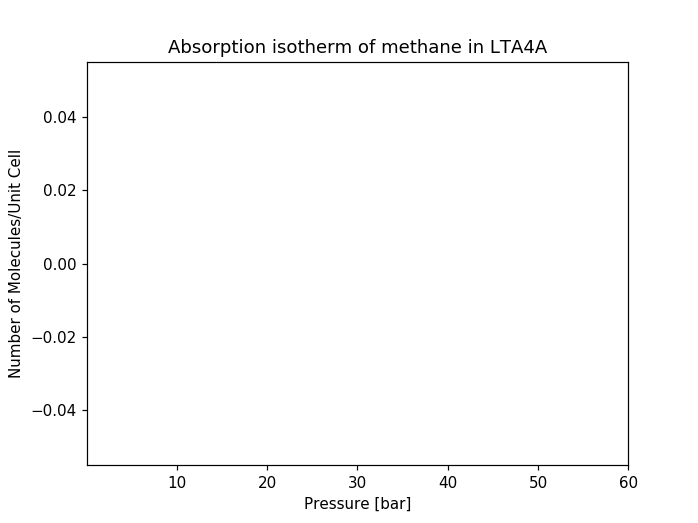

In [10]:
class Plotter(object):
     def __init__(self, scales):
         self._scales = scales
         self._fig, self._ax = plt.subplots()
         self._ax.set_title("Absorption isotherm of methane in LTA4A")
         self._ax.set_xlabel(u"Pressure [bar]")
         self._ax.set_ylabel(u"Number of Molecules/Unit Cell")
         self._ax.set_xlim([scales[0], scales[-1]])
         self._line, = self._ax.plot([], [], marker='o')

     def plot(self, energies):
         self._line.set_xdata(self._scales[0:len(energies)])
         self._line.set_ydata(energies)
         self._ax.relim()
         self._ax.autoscale_view()
         self._fig.canvas.draw()
            
plt_my=Plotter(pressures)
#plt_my.plot([1,2])

In [10]:
isoterm(Str('raspa@hypatia')) # doctest: +SKIP

{'0.1': <ParameterData: uuid: 76432a3c-a1ed-4fea-adce-3e73743eccc9 (pk: 993)>,
 '1': <ParameterData: uuid: 1db02ff4-3025-49fa-9420-711c4647a431 (pk: 998)>,
 '10': <ParameterData: uuid: 72713c03-0fa8-4d62-9413-c8cd64f51b20 (pk: 1008)>,
 '20': <ParameterData: uuid: 309b08a4-857e-4d05-809a-489a6c738832 (pk: 1013)>,
 '30': <ParameterData: uuid: 259f823e-6c99-4561-bdf6-501518f5d942 (pk: 1018)>,
 '40': <ParameterData: uuid: a0e62b3a-b714-4ab7-b6dd-6bd018804e22 (pk: 1023)>,
 '5': <ParameterData: uuid: 01696be5-7445-44f4-acca-e505e2443dfd (pk: 1003)>,
 '60': <ParameterData: uuid: 3d2f77e4-f0ff-43af-ad96-7f163685935c (pk: 1028)>}